## Lotka Volterra Model
## Jean Marie Linhart
## Math 475

The Lotka-Volterra differential equations model a predator and a prey population over time. The predator population is
$y(t)$ and the prey population is $x(t)$ and the behavior of these interacting population is defined by the system of differential equations:
\begin{equation} \dfrac{dx}{dt} = \alpha x - \beta xy \qquad (1)\end{equation}

$$ \dfrac{dy}{dt} = \gamma xy - \delta y\qquad (2)$$

Equation (1) is for the change in the prey population with respect to time. In equation (1), the term $\alpha x$ represents increase or birth in the prey population is proportional to the prey population, and the term $-\beta xy$ represents decrease or death of the prey population is proportional to the product of the number of predators times the number of prey, as prey are primarily killed by interacting with predators.  

Equation (2) is for the change in predator population with respect to time.  In equation (2), the first term $\gamma xy$ represents increase or birth in the predator population.  In this term, predators interact with prey, some of the prey are killed, providing food for the predators and the consequent birth of new predators.  In the second term $-\delta y$, we see predators die proportional to the predator population, as predators are primarily killed by factors such as disease, accident and old age.



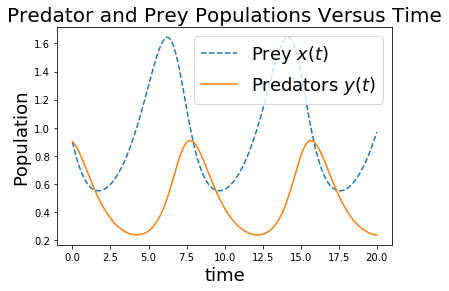

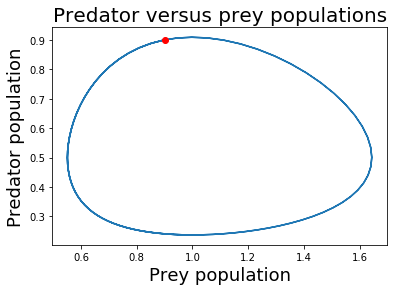

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Lotka-Volterra differential equation
def LotVolt(xx,t,a,b,c,d):
    x = xx[0]
    y = xx[1]
    xp =a*x -b*x*y
    yp = c*x*y - d*y
    return np.array([xp, yp])

a = 2./3.
b = 4./3.
c = 1
d = 1

trange = np.linspace(0,20,200)
xsoln = odeint(LotVolt, [0.9,0.9], trange, (a,b,c,d))
fig=plt.figure()
plt.plot(trange, xsoln[:,0],  linestyle='--', label="Prey $x(t)$")
plt.plot(trange, xsoln[:,1], label="Predators $y(t)$")
plt.title("Predator and Prey Populations Versus Time", fontsize='20')
plt.ylabel("Population", fontsize='18')
plt.legend(fontsize='18')
plt.xlabel("time", fontsize='18')
plt.show()
plt.close()


plt.figure()
plt.plot(xsoln[:,0], xsoln[:,1])
plt.plot(0.9, 0.9, 'o', color='r')
plt.xlabel('Prey population', fontsize='18')
plt.ylabel('Predator population', fontsize='18')
plt.title("Predator versus prey populations", fontsize='20')
plt.show()
plt.close()



## Basic Zombie Model
Now we propose a differential equations model for an outbreak of zombies. We keep track of normal humans, susceptible to becoming zombies $S(t)$, the zombie population $Z(t)$, and the "removed" population (corpses), $R(t)$.
The behavior of these interacting population is defined by the system of differential equations:
\begin{equation} \dfrac{dS}{dt} = \pi S - \beta SZ - \delta S \qquad (1)\end{equation}

$$ \dfrac{dZ}{dt} = \beta SZ + \zeta R -  \alpha SZ\qquad (2)$$

$$ \dfrac{dR}{dt} = \delta S +  \alpha SZ - \zeta R \qquad (3)$$

Equation (1) represents the change in the human population with time; $\pi S$ is the birth of new humans, and $\delta S$ is the natural death of the humans.  The term $\beta SZ$ represents a human-zombie interaction in which a human is infected with zombiism.

Equation (2) represents the change in the zombie population with time; we see an increase due to humans becoming zombies ($\beta SZ)$, increase from Voodoo sorcerers enchanting corpses to rise as zombies $\zeta R$, and death of zombies due to interactions with humans $-\alpha SZ$.

Equation (3) represents the change in the corpses with time; we see an increase in corpses due to natural human death ($\delta S$) and humans killing zombies ($\alpha SZ$), and a decrease due to corpses rising as zombies ($-\zeta R$).

To begin let $\alpha = 0.005$, $\beta = 0.0095$, $\zeta = 0.0001$ and $\delta = 0.0001$, and $\pi = 0$.  Start with 500 (units of) humans, no zombies and no corpses, and one evil Voodoo spell that makes zombies rise from the dead.  What happens?


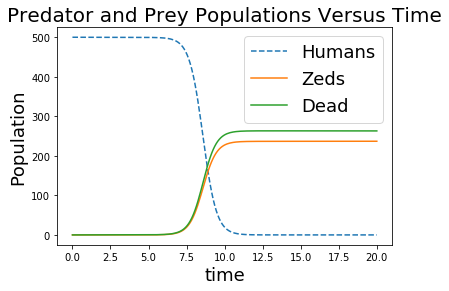

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Zombie-Volterra differential equation
def ZomVolt(xx,t,a,b,d,z,p):
    hum = xx[0]
    zom = xx[1]
    dea = xx[2]
    humP = p*hum - b*hum*zom - d*hum
    zomP = b*hum*zom - a*hum*zom + z*dea
    deaP = a*hum*zom + d*hum - z*dea
    return np.array([humP, zomP, deaP])

a = 0.005
b = 0.0095
d = 0.0001
z = 0.0001
p = 0

trange = np.linspace(0,20,200)
xsoln = odeint(ZomVolt, [500,0,0], trange, (a,b,d,z,p))
fig=plt.figure()
plt.plot(trange, xsoln[:,0],  linestyle='--', label="Humans")
plt.plot(trange, xsoln[:,1], label="Zeds")
plt.plot(trange, xsoln[:,2], label="Dead")
plt.title("Predator and Prey Populations Versus Time", fontsize='20')
plt.ylabel("Population", fontsize='18')
plt.legend(fontsize='18')
plt.xlabel("time", fontsize='18')
plt.show()
plt.close()